### Portfolio 4

In [1]:
your_name = "Trong Hieu Nguyen"
your_student_id = "47610867"

In [1]:
# Opal Trip Counts Data Analysis
# This project analyzes Opal usage data from Transport NSW for different transport modes (bus, rail, ferry) from July 2016 to August 2024.
# The goal is to find patterns in usage across Sydney and link them to demographic data from the Census, focusing on relationships with income, age, and other factors.
# It also aims to predict tap-on events based on nearby tap-offs and see if demographics can predict transport usage.

# Data Source 1: Opal Usage Data
# The dataset includes Opal trip counts by month, transport mode, and card type from 2016 to 2024, covering bus, train, and ferry usage across Sydney.

import pandas as pd

# Load the CSV data
csv_file = 'all-modes-aug-2024.csv'
opal_data = pd.read_csv(csv_file)

# Preview the data
print(opal_data.head())

  Year_Month Travel_Mode    Card_type        Trip
0    2016-07         Bus        Adult  13146432.0
1    2016-07         Bus  Child/Youth   1079640.0
2    2016-07         Bus   Concession   1845322.0
3    2016-07         Bus     Employee     64989.0
4    2016-07         Bus  Free Travel     25228.0


In [3]:
# Loading and Processing Census Data (NSW)
# This data includes demographic information for regions across New South Wales.
# We will focus on variables like average income, age, and population density to link with transport usage data.

censusFile = 'Region summary_ New South Wales STE 1.csv'

# Load the Census CSV file into a DataFrame
census_data = pd.read_csv(censusFile)

# Check the structure of the census dataset
print(census_data.head())

# Now we have two datasets: Opal usage data and Census data for NSW.
# Next steps include exploring the relationships between transport usage and demographic factors.


  Measure Code                                 Parent Description  \
0     ERP_P_20  Estimated resident population - year ended 30 ...   
1       ERP_21  Estimated resident population - year ended 30 ...   
2     ERP_M_20  Estimated resident population - year ended 30 ...   
3     ERP_F_20  Estimated resident population - year ended 30 ...   
4       ERP_19  Estimated resident population - year ended 30 ...   

                                     Description  2011  2015  2016  2017  \
0            Estimated resident population (no.)   NaN   NaN   NaN   NaN   
1               Population density (persons/km2)   NaN   NaN   NaN   NaN   
2    Estimated resident population - males (no.)   NaN   NaN   NaN   NaN   
3  Estimated resident population - females (no.)   NaN   NaN   NaN   NaN   
4                     Median age - males (years)   NaN   NaN   NaN   NaN   

        2018       2019       2020       2021       2022       2023  
0  7954476.0  8046748.0  8110610.0  8097062.0  8166704.0  

Opal Data Columns:
Index(['Year_Month', 'Travel_Mode', 'Card_type', 'Trip'], dtype='object')


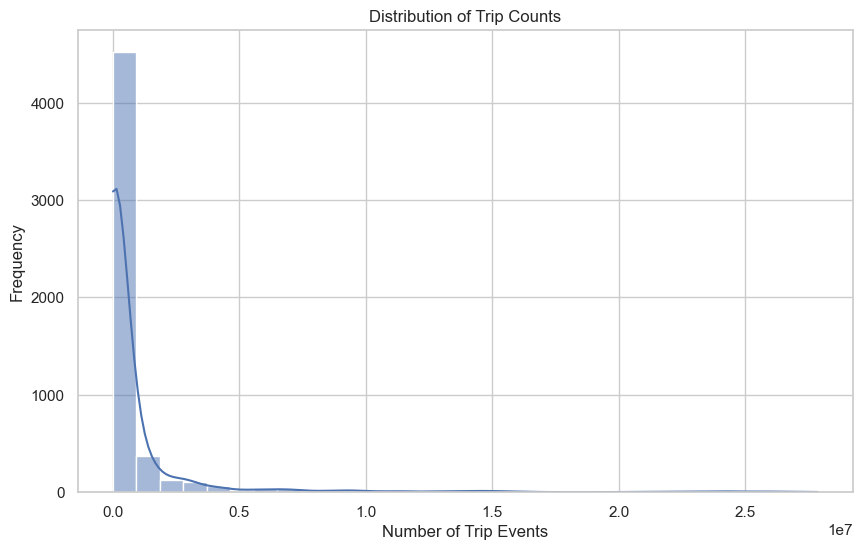

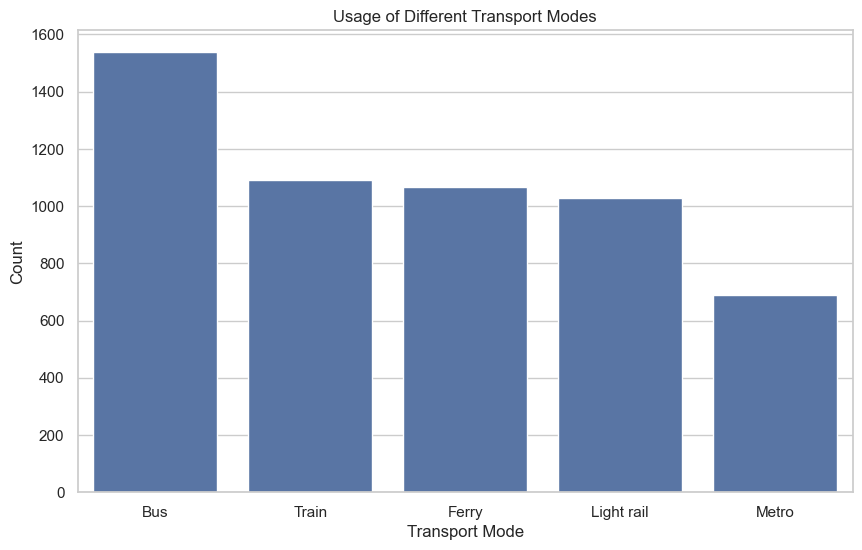

NameError: name 'census_data' is not defined

In [3]:
# Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visualization style
sns.set(style='whitegrid')

# Display the columns of the opal_data DataFrame to verify names
print("Opal Data Columns:")
print(opal_data.columns)

# Plotting the distribution of trip counts
tapOnColumn = "Trip"  # Update based on your actual data
plt.figure(figsize=(10, 6))
sns.histplot(opal_data[tapOnColumn], bins=30, kde=True)
plt.title("Distribution of Trip Counts")
plt.xlabel("Number of Trip Events")
plt.ylabel("Frequency")
plt.show()

# Plotting the distribution of transport modes
modeColumn = "Travel_Mode"  # Update based on your actual data
plt.figure(figsize=(10, 6))
sns.countplot(x=modeColumn, data=opal_data, order=opal_data[modeColumn].value_counts().index)
plt.title("Usage of Different Transport Modes")
plt.xlabel("Transport Mode")
plt.ylabel("Count")
plt.show()

# For Census data
# Create an 'Average Income' column by averaging relevant year columns
census_data['AverageIncome'] = census_data[['2011', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']].mean(axis=1)

# Analyzing Average Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(census_data['AverageIncome'], bins=30, kde=True)
plt.title("Distribution of Average Income")
plt.xlabel("Average Income")
plt.ylabel("Frequency")
plt.show()


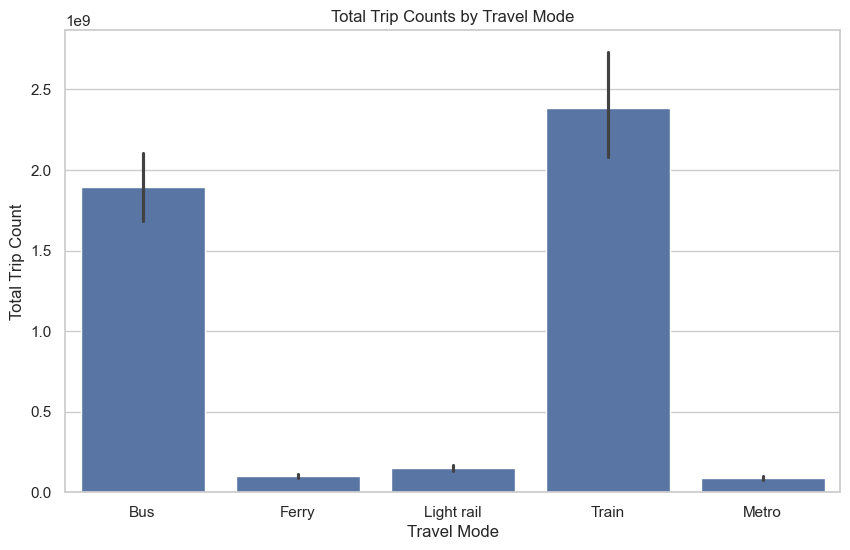

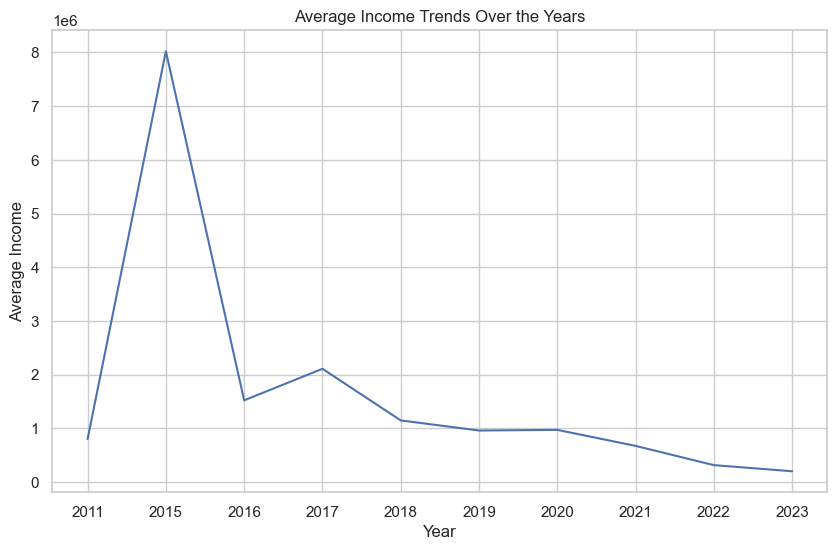

In [5]:
# Bivariate Analysis: Trip Counts by Travel Mode in Opal Data
plt.figure(figsize=(10, 6))
sns.barplot(x='Travel_Mode', y='Trip', data=opal_data, estimator=sum)
plt.title('Total Trip Counts by Travel Mode')
plt.xlabel('Travel Mode')
plt.ylabel('Total Trip Count')
plt.show()

# Bivariate Analysis: Average Income Trends over the Years in Census Data
years = ['2011', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=census_data[years].mean(axis=0))
plt.title('Average Income Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.show()


  Year_Month Travel_Mode Card_type        Trip  Year Measure Code  \
0    2016-07         Bus     Adult  13146432.0  2016     ERP_P_20   
1    2016-07         Bus     Adult  13146432.0  2016       ERP_21   
2    2016-07         Bus     Adult  13146432.0  2016     ERP_M_20   
3    2016-07         Bus     Adult  13146432.0  2016     ERP_F_20   
4    2016-07         Bus     Adult  13146432.0  2016       ERP_19   

                                  Parent Description  \
0  Estimated resident population - year ended 30 ...   
1  Estimated resident population - year ended 30 ...   
2  Estimated resident population - year ended 30 ...   
3  Estimated resident population - year ended 30 ...   
4  Estimated resident population - year ended 30 ...   

                                     Description  AverageIncome  
0            Estimated resident population (no.)            NaN  
1               Population density (persons/km2)            NaN  
2    Estimated resident population - males (no.)  

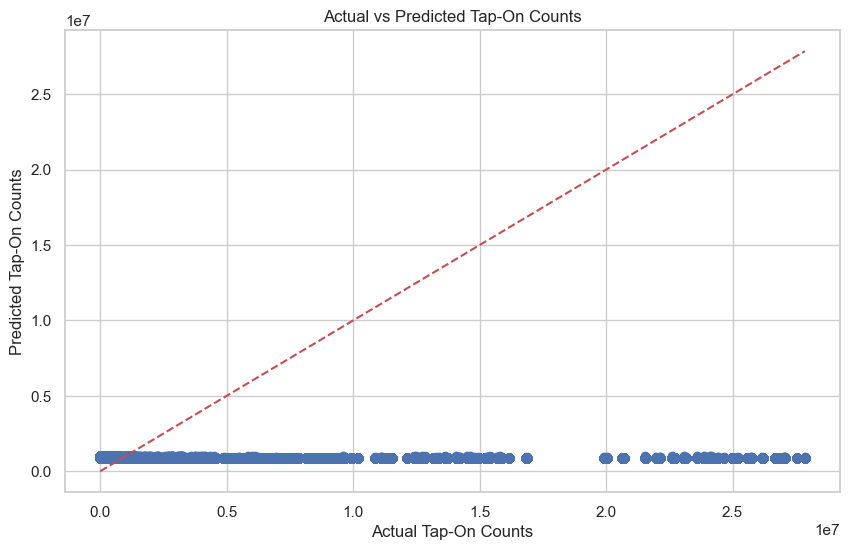

In [6]:
# Performing Linear Regression with the data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Extract the year from 'Year_Month' column in opal_data
opal_data['Year'] = opal_data['Year_Month'].str[:4].astype(int)

# Rename the 'AverageIncome' column in census_data to avoid conflicts during melt
census_data.rename(columns={'AverageIncome': 'OriginalAverageIncome'}, inplace=True)

# Melt the Census data to have 'Year' and 'AverageIncome' as columns
census_melted = pd.melt(census_data, id_vars=['Measure Code', 'Parent Description', 'Description'], 
                        value_vars=['2011', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
                        var_name='Year', value_name='AverageIncome')

# Convert 'Year' to int to match with the extracted year in Opal data
census_melted['Year'] = census_melted['Year'].astype(int)

# Merge the Opal data with the melted Census data
merged_data = pd.merge(opal_data, census_melted, on='Year', how='inner')

# Check if the merge worked
print(merged_data.head())

# Impute missing values in the 'AverageIncome' column with the median
merged_data['AverageIncome'] = merged_data['AverageIncome'].fillna(merged_data['AverageIncome'].median())

# Define features and target variable
X = merged_data[['AverageIncome']]  # Independent variable
y = merged_data['Trip']             # Dependent variable (assuming 'Trip' means 'TapOnCount')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualizing the regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Line for perfect predictions
plt.xlabel('Actual Tap-On Counts')
plt.ylabel('Predicted Tap-On Counts')
plt.title('Actual vs Predicted Tap-On Counts')
plt.show()



Multivariate Regression - Mean Squared Error: 4728473097302.06
Multivariate Regression - R-squared: 0.44


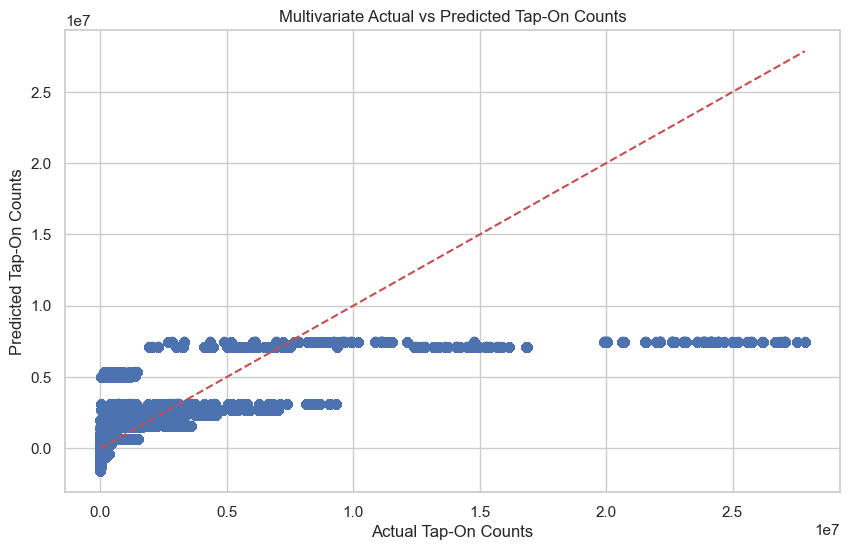

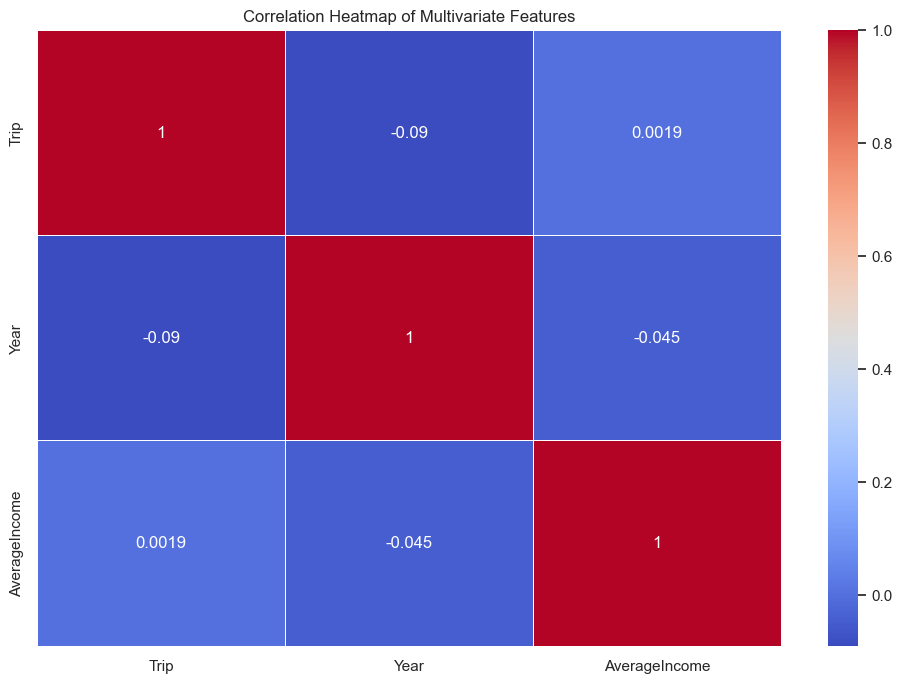

In [7]:
# Multivariate Data Analysis

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
# =============================
# Including 'AverageIncome' and exploring 'Card_type' and 'Travel_Mode'
# Convert categorical variables to numerical using One-Hot Encoding for 'Card_type' and 'Travel_Mode'.
merged_data_encoded = pd.get_dummies(merged_data, columns=['Card_type', 'Travel_Mode'], drop_first=True)

# Define features and target variable
# ================================
X = merged_data_encoded[['AverageIncome'] + [col for col in merged_data_encoded.columns if 'Card_type_' in col or 'Travel_Mode_' in col]]  # Multivariate features
y = merged_data_encoded['Trip']  # Dependent variable (assuming 'Trip' means 'TapOnCount')

# Split the data into training and testing sets
# ================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multivariate Regression Model
# ================================
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
# ================================
y_pred = model.predict(X_test)

# Model Evaluation
# ================================
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Multivariate Regression - Mean Squared Error: {mse:.2f}")
print(f"Multivariate Regression - R-squared: {r2:.2f}")

# Visualizing the Regression Results
# ================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Line for perfect predictions
plt.xlabel('Actual Tap-On Counts')
plt.ylabel('Predicted Tap-On Counts')
plt.title('Multivariate Actual vs Predicted Tap-On Counts')
plt.show()

# Correlation Heatmap for Feature Relationships
# ================================
# Select only numeric columns for the correlation matrix
numeric_columns = merged_data_encoded.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(merged_data_encoded[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Multivariate Features')
plt.show()

# Running this block of code may take some time to process*


In [5]:
# Advanced Predictive Modeling

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Reusing preprocessed data from Multivariate Regression
# Assuming that X (features) and y (target variable) have already been defined in Block 4.

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Regressor
print("Decision Tree training started...")
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
print("Decision Tree training completed.")

# Train a Random Forest Regressor (Reduced Estimators to Avoid Overload)
print("Random Forest training started with 10 estimators...")
random_forest_model = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest_model.fit(X_train, y_train)
print("Random Forest training completed.")

# Making predictions on the test set
print("Making predictions on the test set...")
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)
print("Predictions completed.")

# Evaluate both models using Mean Squared Error (MSE) and R-squared (R²) score for performance comparison.
# Decision Tree Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Random Forest Evaluation
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Output the evaluation results
print(f"Decision Tree - Mean Squared Error: {mse_tree:.2f}, R-squared: {r2_tree:.2f}")
print(f"Random Forest - Mean Squared Error: {mse_forest:.2f}, R-squared: {r2_forest:.2f}")

# Visualize the Predictions for Both Models (Sampling for Efficient Plotting)
print("Generating visualizations for model predictions...")
sample_indices = np.random.choice(len(y_test), size=100, replace=False)

plt.figure(figsize=(14, 7))

# Plot for Decision Tree Predictions (sampled)
plt.subplot(1, 2, 1)
plt.scatter(y_test.iloc[sample_indices], y_pred_tree[sample_indices], alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Tap-On Counts')
plt.ylabel('Predicted Tap-On Counts')
plt.title('Decision Tree: Actual vs Predicted Tap-On Counts')

# Plot for Random Forest Predictions (sampled)
plt.subplot(1, 2, 2)
plt.scatter(y_test.iloc[sample_indices], y_pred_forest[sample_indices], alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Tap-On Counts')
plt.ylabel('Predicted Tap-On Counts')
plt.title('Random Forest: Actual vs Predicted Tap-On Counts')

plt.tight_layout()
plt.show()

# Visualizing feature importance for Random Forest
print("Visualizing feature importance for Random Forest...")
importances = random_forest_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print shapes to confirm data integrity
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# This block of code takes ages to compile and process please be patient when running, Thank You.


NameError: name 'X' is not defined

In [7]:
# Import required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
print("Training Decision Tree...")
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Train Random Forest Regressor with 10 trees
print("Training Random Forest...")
random_forest = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest.fit(X_train, y_train)

# Predict using both models
print("Generating predictions...")
y_pred_tree = decision_tree.predict(X_test)
y_pred_forest = random_forest.predict(X_test)

# Evaluate models with MSE and R-squared
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Print evaluation results
print(f"Decision Tree - MSE: {mse_tree:.2f}, R²: {r2_tree:.2f}")
print(f"Random Forest - MSE: {mse_forest:.2f}, R²: {r2_forest:.2f}")

# Sample 100 points for visualization
sample_indices = np.random.choice(len(y_test), size=100, replace=False)

# Plot actual vs predicted for both models
plt.figure(figsize=(14, 7))

# Decision Tree plot
plt.subplot(1, 2, 1)
plt.scatter(y_test.iloc[sample_indices], y_pred_tree[sample_indices], alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Random Forest plot
plt.subplot(1, 2, 2)
plt.scatter(y_test.iloc[sample_indices], y_pred_forest[sample_indices], alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

plt.tight_layout()
plt.show()

# Feature importance from Random Forest
print("Feature importance:")
importances = random_forest.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Check data shapes
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Train target: {y_train.shape}, Test target: {y_test.shape}")



NameError: name 'X' is not defined

In [9]:
# Data Preparation: Loading and Splitting the Opal Usage Data

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Opal usage dataset
csvFile = 'all-modes-aug-2024.csv'
opal_data = pd.read_csv(csvFile)

# Inspect the first few rows of the dataset
print(opal_data.head())

# Define features (X) and target variable (y)
X = opal_data.drop(columns=['Trip'])  # Features (all except the 'Trip' column)
y = opal_data['Trip']  # Target (number of trips we're trying to predict)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  Year_Month Travel_Mode    Card_type        Trip
0    2016-07         Bus        Adult  13146432.0
1    2016-07         Bus  Child/Youth   1079640.0
2    2016-07         Bus   Concession   1845322.0
3    2016-07         Bus     Employee     64989.0
4    2016-07         Bus  Free Travel     25228.0


=== Linear Regression ===
Mean Squared Error: 6534942447479.749
R^2 Score: 0.429001739580781
=== K-Nearest Neighbors ===
Mean Squared Error: 386978796522.6361
R^2 Score: 0.9661872738116057


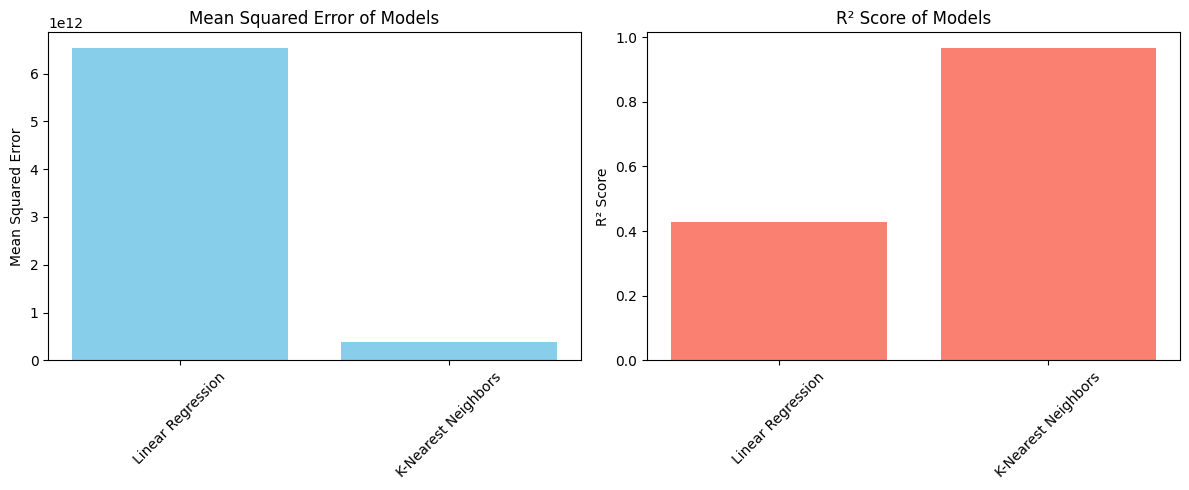

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Load the datasets
opal_data = pd.read_csv('all-modes-aug-2024.csv')
census_data = pd.read_csv('Region summary_ New South Wales STE 1.csv')

# Create a copy of the Opal data for processing
df = opal_data.copy()

# Convert 'Year_Month' to datetime and extract the year and month as separate numeric columns
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month

# Group the data by Year, Month, Travel_Mode, and Card_type, and sum the trips
df_grouped = df.groupby(['Year', 'Month', 'Travel_Mode', 'Card_type'], as_index=False).agg({'Trip': 'sum'})

# Define X (features) and y (target)
X = df_grouped.drop(columns=['Trip'])
y = df_grouped['Trip']  # Predicting the trip counts

# Handle missing values in X with forward fill
X.ffill(inplace=True)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical and numeric features
categorical_features = ['Travel_Mode', 'Card_type']
numeric_features = ['Year', 'Month']

# Create a ColumnTransformer for data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
}

# Evaluate models
for model_name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    clf.fit(X_train, y_train)  # Fit the model on the training data
    y_pred = clf.predict(X_test)  # Predict on the test set
    
    # Evaluate the model
    print(f'=== {model_name} ===')
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('R^2 Score:', r2_score(y_test, y_pred))

# Store results for plotting
results = {
    'Model': [],
    'Mean Squared Error': [],
    'R^2 Score': []
}

# Evaluate models and store results
for model_name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results['Model'].append(model_name)
    results['Mean Squared Error'].append(mse)
    results['R^2 Score'].append(r2)

# Create DataFrame for results
results_df = pd.DataFrame(results)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mean Squared Error Bar Plot
ax[0].bar(results_df['Model'], results_df['Mean Squared Error'], color='skyblue')
ax[0].set_title('Mean Squared Error of Models')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_xticks(range(len(results_df['Model'])))
ax[0].set_xticklabels(results_df['Model'], rotation=45)

# R² Score Bar Plot
ax[1].bar(results_df['Model'], results_df['R^2 Score'], color='salmon')
ax[1].set_title('R² Score of Models')
ax[1].set_ylabel('R² Score')
ax[1].set_xticks(range(len(results_df['Model'])))
ax[1].set_xticklabels(results_df['Model'], rotation=45)

plt.tight_layout()
plt.show()


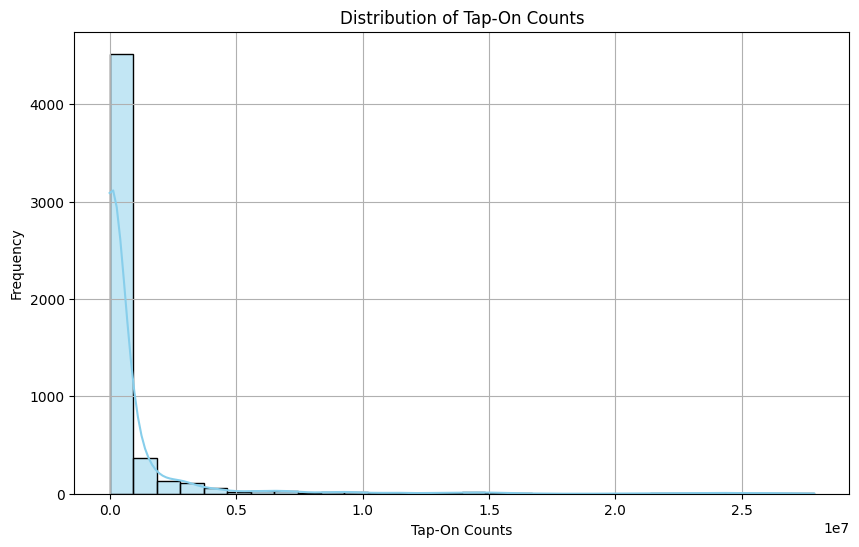

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of tap-on counts
plt.figure(figsize=(10, 6))
sns.histplot(opal_data['Trip'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tap-On Counts')
plt.xlabel('Tap-On Counts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


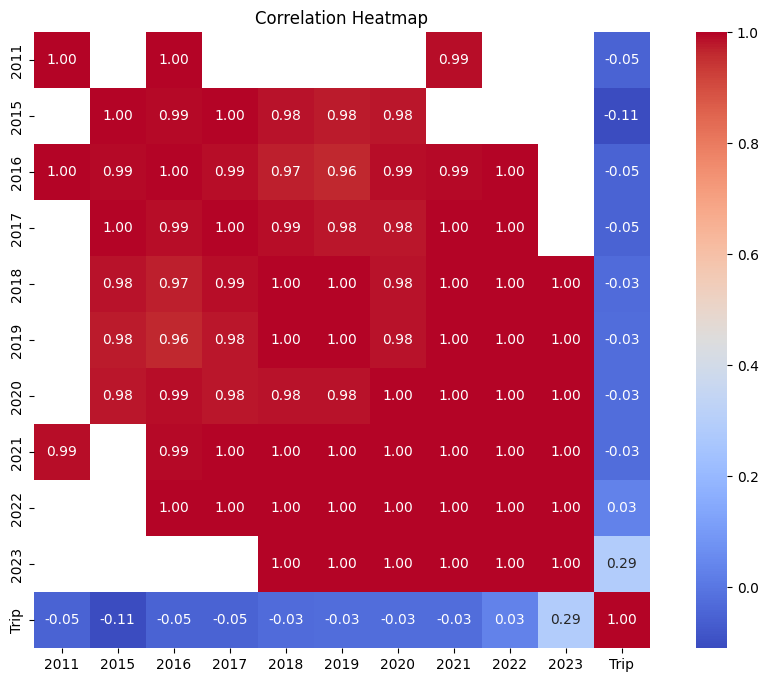

In [38]:
# Combine census and opal data for correlation analysis
combined_data = pd.merge(census_data, opal_data, left_index=True, right_index=True)

# Select only numeric columns for correlation
numeric_data = combined_data.select_dtypes(include='number')

# Calculate correlations
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


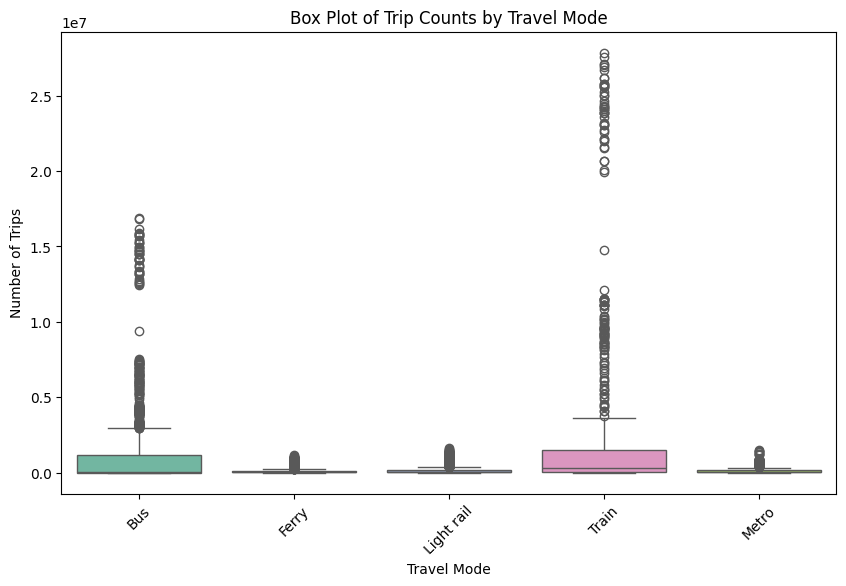

In [40]:
# Box plot for Trip counts based on Travel Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Travel_Mode', y='Trip', data=opal_data, hue='Travel_Mode', palette='Set2', legend=False)
plt.title('Box Plot of Trip Counts by Travel Mode')
plt.xlabel('Travel Mode')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

In [43]:
print(combined_data.columns)


Index(['Measure Code', 'Parent Description', 'Description', '2011', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'Year_Month', 'Travel_Mode', 'Card_type', 'Trip'],
      dtype='object')


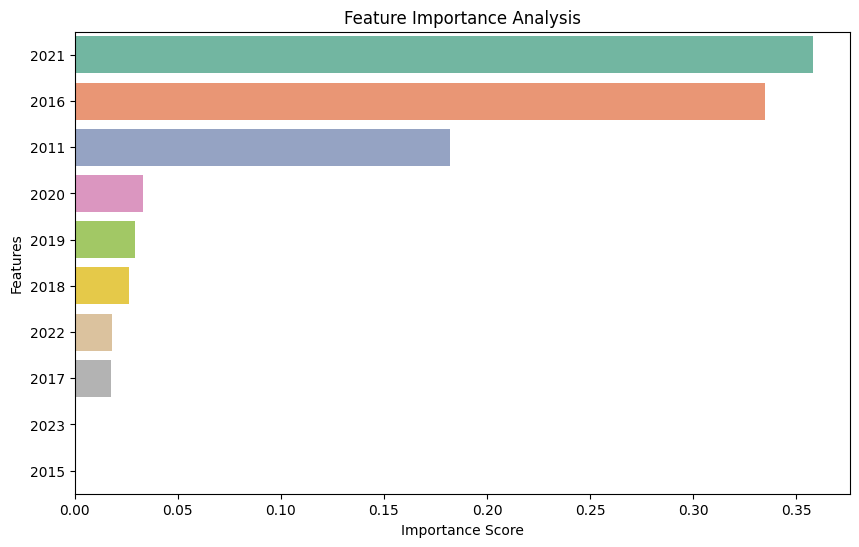

In [49]:
# Step 14: Feature Importance Analysis
from sklearn.ensemble import RandomForestClassifier
importances = None

# Prepare your features and target again for clarity
X = combined_data[['2011', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]  # Using year columns as features

# Define the target variable y based on the 'Trip' column in combined_data
y = (combined_data['Trip'] > 100).astype(int)  # Adjust target based on your criteria

# Ensure X and y have the same length
if len(X) == len(y):
    # Fit the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    # Get feature importances
    importances = model.feature_importances_

    # Create a DataFrame for visualization
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', palette='Set2', legend=False)
    plt.title('Feature Importance Analysis')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print(f"Length mismatch: X has {len(X)} samples, while y has {len(y)} samples.")
